In [7]:
import numpy as np
import scipy as sp
from scipy.linalg import eigh
from matplotlib import pyplot as plt
%matplotlib ipython magic 
%config InlineBackend.figure_format='retina'

UsageError: unrecognized arguments: magic


In [3]:
# To get higher res. pictures
#%matplotlib inline
#%config InlineBackend.figure_format='retina'
#%%

def eulerstep(Tdx, uold, dt):
    unew = uold + dt*(Tdx @ uold)
    return unew

def creatTdx(L, N):
    dx = L/(N+1)
    sub = np.ones(N-1)
    sup = np.ones(N-1)
    main = -2*np.ones(N)
    T = np.diag(sub, -1) + np.diag(main, 0) + np.diag(sup, 1)
    Tdx = T/(dx**2)
    return Tdx, dx

def solve_diffusion_equation(N, M, g, tend,L):
    Tdx, dx = creatTdx(L, N)
    dt = tend / M
    x = np.linspace(0, L, N)
    xx = np.linspace(0, L, N+2)
    tt = np.linspace(0, tend, M+1)
    T, X = np.meshgrid(tt, xx)


    u = g(x)
    u = u.T

    # Store the solution at each time step
    u_bc = np.pad(u, (1, 1), mode='constant', constant_values=0)
    solution = [u_bc.copy()]

    for n in range(1, M + 1):
        u = eulerstep(Tdx, u, dt)
        u_bc = np.pad(u, (1, 1), mode='constant', constant_values=0)
        solution.append(u_bc.copy())

    
    return np.array(solution), T, X

In [4]:
L = 1
N = 50
M = 100
tend = 1.0
g = lambda x: np.sin(np.pi * x)

solution, T, X = solve_diffusion_equation(N, M, g, tend, L)
print(np.shape(solution))
print(np.shape(T))
print(np.shape(X))
print(solution)
print(T)
print(X)

(101, 52)
(52, 101)
(52, 101)
[[ 0.00000000e+000  0.00000000e+000  6.40702200e-002 ...  6.40702200e-002
   1.22464680e-016  0.00000000e+000]
 [ 0.00000000e+000  1.66646642e+000  5.72223520e-002 ...  5.72223520e-002
   1.66646642e+000  0.00000000e+000]
 [ 0.00000000e+000 -8.35347635e+001  4.33958980e+001 ...  4.33958980e+001
  -8.35347635e+001  0.00000000e+000]
 ...
 [ 0.00000000e+000 -6.83882896e+192  1.32712879e+193 ...  1.32712879e+193
  -6.83882896e+192  0.00000000e+000]
 [ 0.00000000e+000  6.94103253e+194 -1.34737055e+195 ... -1.34737055e+195
   6.94103253e+194  0.00000000e+000]
 [ 0.00000000e+000 -7.04582558e+196  1.36811901e+197 ...  1.36811901e+197
  -7.04582558e+196  0.00000000e+000]]
[[0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 ...
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]
 [0.   0.01 0.02 ... 0.98 0.99 1.  ]]
[[0.         0.         0.         ... 0.         0.         0.       

/var/folders/49/7szg3jv54b5fh9q5qh87fv2r0000gn/T/ipykernel_92891/470069125.py:8: RuntimeWarning: divide by zero encountered in log
  ax.plot_surface(T, X, np.log(solution.T))
/var/folders/49/7szg3jv54b5fh9q5qh87fv2r0000gn/T/ipykernel_92891/470069125.py:8: RuntimeWarning: invalid value encountered in log
  ax.plot_surface(T, X, np.log(solution.T))


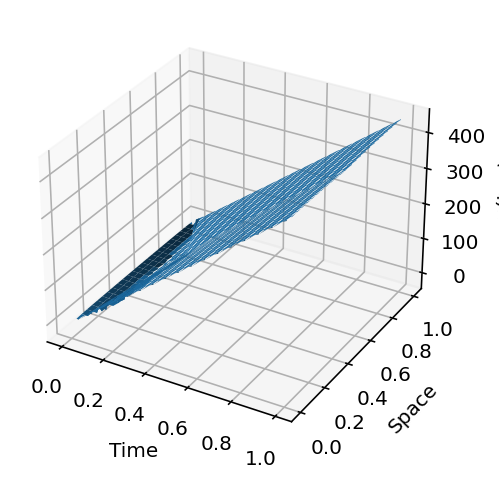

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

T, X = np.meshgrid(np.linspace(0, tend, M + 1), np.linspace(0, L, N + 2))
# Corrected indexing in the plot_surface call


ax.plot_surface(T, X, np.log(solution.T))
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('u(t, x)')
plt.show()
#%%
def crank_nicolson(Tdx, uold, td):
    r, _ = np.shape(Tdx)
    I = np.identity(r)
    A = (I - (td/2)*Tdx)
    B = uold @ (I + (td/2)*Tdx)
    X = np.linalg.solve(A, B)
    return X

In [6]:
np.shape(solution)

(101, 52)